In [1]:
import cv2 #only used for reading image as some error i faced with plt imread
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Question 1: Motion Estimation

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def three_step_search(macblock, anc_search): #3 Step Search
    h, w = anc_search.shape
    y, x = int(h/2), int(w/2) 
    minmad = np.inf
    minp = None
    steps = [4,2,1] #steps decreasing +-1,2,4
    for step in steps:
        p1 = (x, y)
        p2 = (x+step, y)
        p3 = (x, y+step)
        p4 = (x+step, y+step)
        p5 = (x-step, y)
        p6 = (x, y-step)
        p7 = (x-step, y-step)
        p8 = (x+step, y-step)
        p9 = (x-step, y+step)
        points = [p1,p2,p3,p4,p5,p6,p7,p8,p9]

        for p in range(len(points)):
            px, py = points[p] 
            px, py = px-int(16/2), py-int(16/2) 
            px, py = max(0,px), max(0,py)
            aBlock = anc_search[py:py+16, px:px+16] 
            aBlock.shape == macblock.shape
            mad = np.sum(np.abs(np.subtract(macblock, aBlock)))/(macblock.shape[0]*macblock.shape[1]) #MAD
            if mad < minmad:
                minmad = mad
                minp = points[p]

    px, py = minp 
    px, py = px - int(16/2), py - int(16/2) 
    px, py = max(0, px), max(0, py) 
    mat_block = anc_search[py:py + 16, px:px + 16]   
#     print(x,y,px,py)
    return mat_block,x,y,px,py

#Frame prediction
def pred_frame(anchor, target):
    h, w = anchor.shape
    h_mod = int(h / 16)
    w_mod = int(w / 16)
    t,r,pt,pr=[],[],[],[]
    predicted = np.ones((h, w))*255
    bcount = 0
    for y in range(0, int(h_mod*16), 16):
        for x in range(0, int(w_mod*16), 16):
            bcount+=1
            tar = target[y:y+16, x:x+16] 
            h, w = anchor.shape
            cent_x, cent_y = (int(x + 16/2), int(y + 16/2))

            sx = max(0, cent_x-int(16/2)-7)
            sy = max(0, cent_y-int(16/2)-7)
            anc_searcharea = anchor[sy:min(sy+7*2+16, h), sx:min(sx+7*2+16, w)]
            anc_block,m,n,pm,pn = three_step_search(tar, anc_searcharea)
            predicted[y:y+16, x:x+16] = anc_block
            t.append(m)
            r.append(n)
            pt.append(pm)
            pr.append(pn)

    return predicted,t,r,pt,pr

frame1 = cv2.imread("second_frame.png",0)
frame2 = cv2.imread("first_frame.png",0)

predictedframe,m,n,pm,pn = pred_frame(frame1, frame2)
errorframe = np.subtract(frame1, predictedframe)
m=np.asarray(m)
n=np.asarray(n)
pm=np.asarray(pm)
pn=np.asarray(pn)



First frame


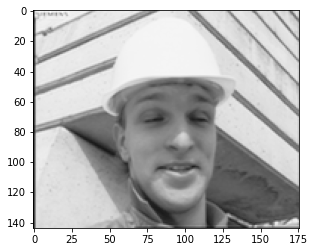

1.3) Predicted frame


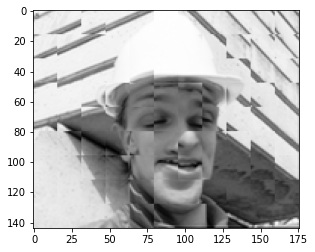

1.4) Error frame


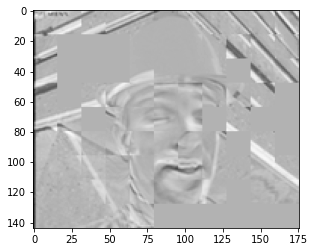

1.4) Error between the second frame and its motion compensated predicted version: 13.37


In [3]:
plt.imshow(frame2,cmap='Greys_r')
print("First frame")
plt.show()

plt.imshow(predictedframe,cmap='Greys_r')
print("1.3) Predicted frame")
plt.show()

plt.imshow(errorframe,cmap='Greys_r')
print("1.4) Error frame")
plt.show()

errormad = np.sum(np.abs(errorframe))/(errorframe.shape[0]*errorframe.shape[1])

print("1.4) Error between the second frame and its motion compensated predicted version: {:.2f}".format(errormad))